In [21]:
# Ph·∫°m M·∫°nh Th·∫Øng - B22DCVT527
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
tf.random.set_seed(42)

print(f"Phi√™n b·∫£n Tensorflow: {tf.__version__}")
print(f" Phi√™n b·∫£n Keras: {keras.__version__}")

Phi√™n b·∫£n Tensorflow: 2.20.0
 Phi√™n b·∫£n Keras: 3.11.2


In [22]:
# ƒê·ªçc d·ªØ li·ªáu weather.csv
df = pd.read_csv('weather.csv')

print("="*60)
print("TH√îNG TIN D·ªÆ LI·ªÜU WEATHER")
print("="*60)
print(f"Shape: {df.shape}")
print(f"\nC√°c c·ªôt trong file:")
print(df.columns.tolist())
print(f"\nKi·ªÉu d·ªØ li·ªáu:")
print(df.dtypes)
print(f"\n5 d√≤ng ƒë·∫ßu ti√™n:")
print(df.head())
print(f"\nTh·ªëng k√™ m√¥ t·∫£:")
print(df.describe())
print("="*60)

TH√îNG TIN D·ªÆ LI·ªÜU WEATHER
Shape: (48, 6)

C√°c c·ªôt trong file:
['Th√°ng', 'Nhi·ªát ƒë·ªô th·∫•p nh·∫•t', 'Nhi·ªát ƒë·ªô trung b√¨nh', 'Nhi·ªát ƒë·ªô cao nh·∫•t', 'L∆∞·ª£ng m∆∞a', 'Giai ƒëo·∫°n']

Ki·ªÉu d·ªØ li·ªáu:
Th√°ng                   object
Nhi·ªát ƒë·ªô th·∫•p nh·∫•t     float64
Nhi·ªát ƒë·ªô trung b√¨nh    float64
Nhi·ªát ƒë·ªô cao nh·∫•t      float64
L∆∞·ª£ng m∆∞a              float64
Giai ƒëo·∫°n               object
dtype: object

5 d√≤ng ƒë·∫ßu ti√™n:
       Th√°ng  Nhi·ªát ƒë·ªô th·∫•p nh·∫•t  Nhi·ªát ƒë·ªô trung b√¨nh  Nhi·ªát ƒë·ªô cao nh·∫•t  \
0  Th√°ng m·ªôt               15.86                19.77              23.72   
1  Th√°ng hai               16.79                20.69              24.63   
2   Th√°ng ba               16.74                22.18              27.68   
3   Th√°ng t∆∞               21.32                25.38              29.48   
4  Th√°ng nƒÉm               23.07                26.96              30.90   

   L∆∞·ª£ng m∆∞a  Giai ƒëo·∫°n  
0 

In [23]:
# Ki·ªÉm tra v√† x·ª≠ l√Ω missing values
print("Ki·ªÉm tra Missing Values:")
print(df.isnull().sum())

# Ki·ªÉm tra c√°c gi√° tr·ªã unique
print(f"\nC√°c giai ƒëo·∫°n th·ªùi gian:")
print(df['Giai ƒëo·∫°n'].unique())

print(f"\nC√°c th√°ng:")
print(df['Th√°ng'].unique())

Ki·ªÉm tra Missing Values:
Th√°ng                  0
Nhi·ªát ƒë·ªô th·∫•p nh·∫•t     0
Nhi·ªát ƒë·ªô trung b√¨nh    0
Nhi·ªát ƒë·ªô cao nh·∫•t      0
L∆∞·ª£ng m∆∞a              0
Giai ƒëo·∫°n              0
dtype: int64

C√°c giai ƒëo·∫°n th·ªùi gian:
['1901-1930' '1931-1960' '1961-1990' '1991-2020']

C√°c th√°ng:
['Th√°ng m·ªôt' 'Th√°ng hai' 'Th√°ng ba' 'Th√°ng t∆∞' 'Th√°ng nƒÉm' 'Th√°ng s√°u'
 'Th√°ng b·∫£y' 'Th√°ng t√°m' 'Th√°ng ch√≠n' 'Th√°ng m∆∞·ªùi' 'Th√°ng m∆∞·ªùi m·ªôt'
 'Th√°ng m∆∞·ªùi hai']


In [24]:
# T·∫°o numeric month column ƒë·ªÉ d·ªÖ v·∫Ω bi·ªÉu ƒë·ªì
month_mapping = {
    'Th√°ng m·ªôt': 1, 'Th√°ng hai': 2, 'Th√°ng ba': 3, 'Th√°ng t∆∞': 4,
    'Th√°ng nƒÉm': 5, 'Th√°ng s√°u': 6, 'Th√°ng b·∫£y': 7, 'Th√°ng t√°m': 8,
    'Th√°ng ch√≠n': 9, 'Th√°ng m∆∞·ªùi': 10, 'Th√°ng m∆∞·ªùi m·ªôt': 11, 'Th√°ng m∆∞·ªùi hai': 12
}

df['month_num'] = df['Th√°ng'].map(month_mapping)

print("ƒê√£ th√™m c·ªôt month_num:")
print(df[['Th√°ng', 'month_num']].head())

ƒê√£ th√™m c·ªôt month_num:
       Th√°ng  month_num
0  Th√°ng m·ªôt          1
1  Th√°ng hai          2
2   Th√°ng ba          3
3   Th√°ng t∆∞          4
4  Th√°ng nƒÉm          5


In [25]:
# L·∫•y danh s√°ch c√°c giai ƒëo·∫°n
periods = df['Giai ƒëo·∫°n'].unique()
print(f"C√°c giai ƒëo·∫°n: {periods}")

C√°c giai ƒëo·∫°n: ['1901-1930' '1931-1960' '1961-1990' '1991-2020']


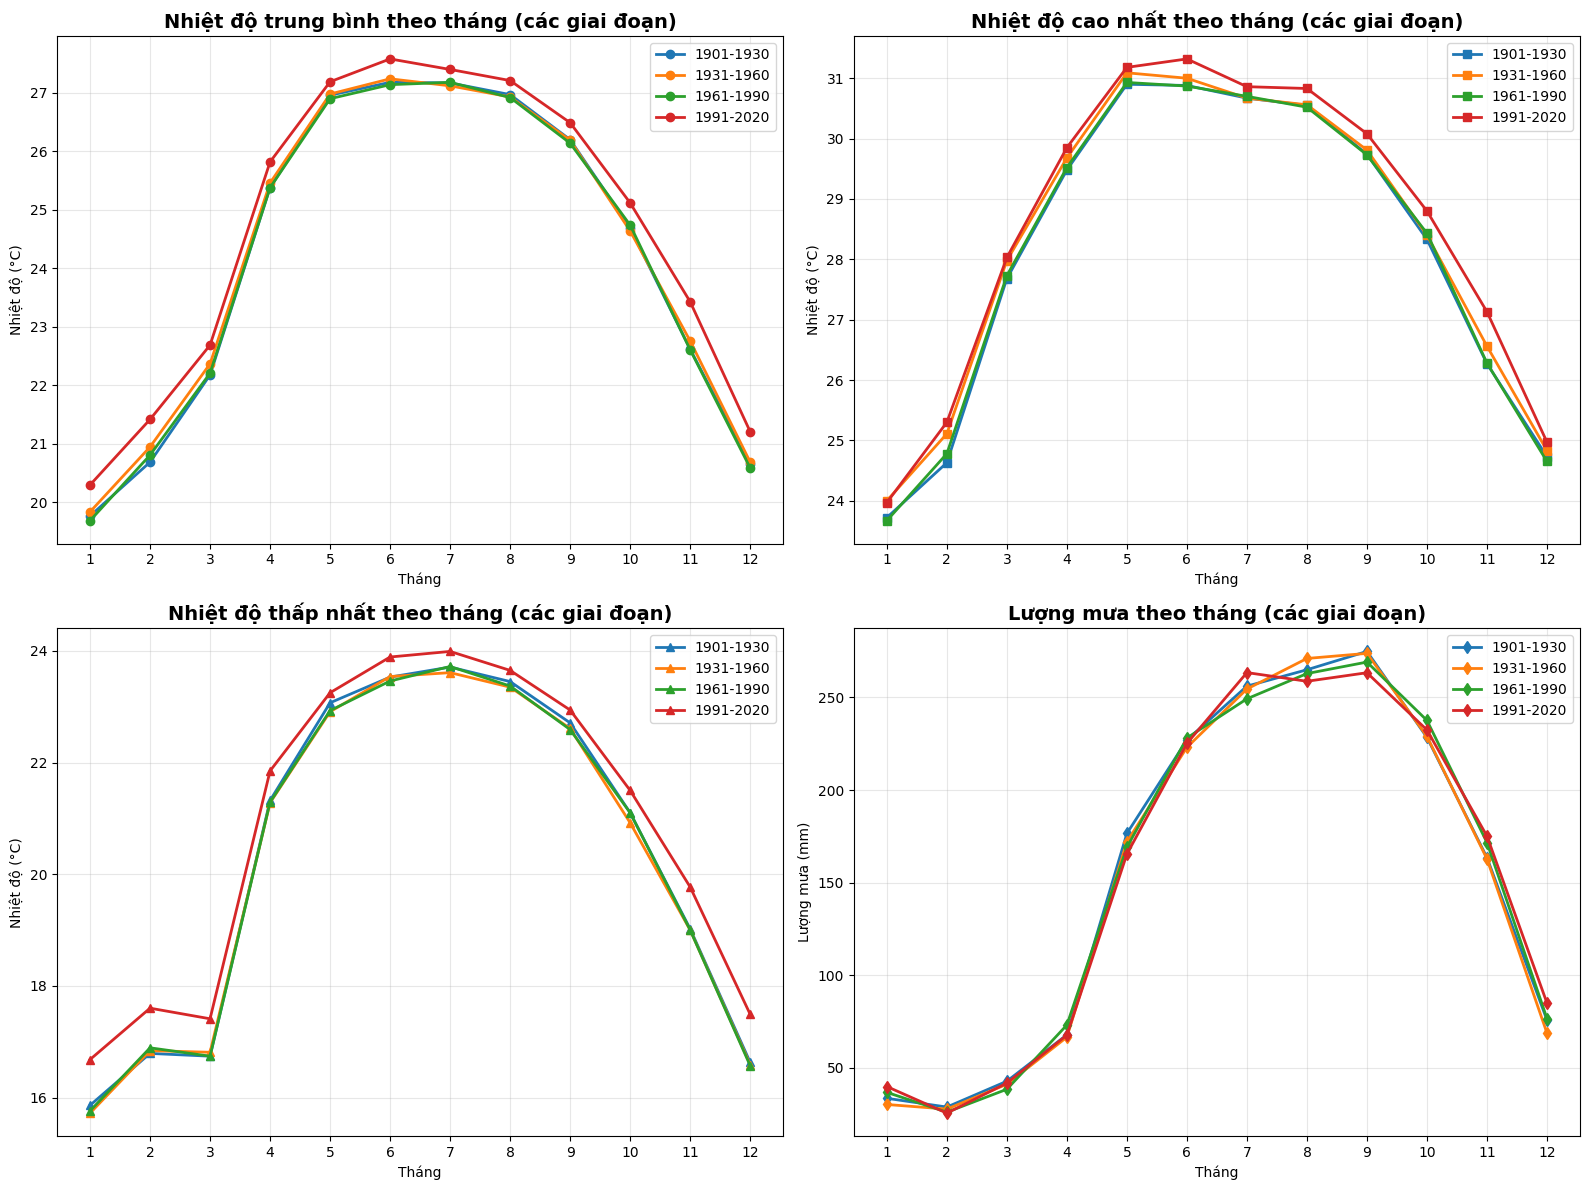

In [26]:
# V·∫Ω bi·ªÉu ƒë·ªì nhi·ªát ƒë·ªô theo th√°ng cho c√°c giai ƒëo·∫°n
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Bi·ªÉu ƒë·ªì 1: Nhi·ªát ƒë·ªô trung b√¨nh theo th√°ng
for period in periods:
    period_data = df[df['Giai ƒëo·∫°n'] == period].sort_values('month_num')
    axes[0].plot(period_data['month_num'], period_data['Nhi·ªát ƒë·ªô trung b√¨nh'], 
                 marker='o', label=period, linewidth=2)

axes[0].set_title('Nhi·ªát ƒë·ªô trung b√¨nh theo th√°ng (c√°c giai ƒëo·∫°n)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Th√°ng')
axes[0].set_ylabel('Nhi·ªát ƒë·ªô (¬∞C)')
axes[0].set_xticks(range(1, 13))
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Bi·ªÉu ƒë·ªì 2: Nhi·ªát ƒë·ªô cao nh·∫•t theo th√°ng
for period in periods:
    period_data = df[df['Giai ƒëo·∫°n'] == period].sort_values('month_num')
    axes[1].plot(period_data['month_num'], period_data['Nhi·ªát ƒë·ªô cao nh·∫•t'], 
                 marker='s', label=period, linewidth=2)

axes[1].set_title('Nhi·ªát ƒë·ªô cao nh·∫•t theo th√°ng (c√°c giai ƒëo·∫°n)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Th√°ng')
axes[1].set_ylabel('Nhi·ªát ƒë·ªô (¬∞C)')
axes[1].set_xticks(range(1, 13))
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Bi·ªÉu ƒë·ªì 3: Nhi·ªát ƒë·ªô th·∫•p nh·∫•t theo th√°ng
for period in periods:
    period_data = df[df['Giai ƒëo·∫°n'] == period].sort_values('month_num')
    axes[2].plot(period_data['month_num'], period_data['Nhi·ªát ƒë·ªô th·∫•p nh·∫•t'], 
                 marker='^', label=period, linewidth=2)

axes[2].set_title('Nhi·ªát ƒë·ªô th·∫•p nh·∫•t theo th√°ng (c√°c giai ƒëo·∫°n)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Th√°ng')
axes[2].set_ylabel('Nhi·ªát ƒë·ªô (¬∞C)')
axes[2].set_xticks(range(1, 13))
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Bi·ªÉu ƒë·ªì 4: L∆∞·ª£ng m∆∞a theo th√°ng
for period in periods:
    period_data = df[df['Giai ƒëo·∫°n'] == period].sort_values('month_num')
    axes[3].plot(period_data['month_num'], period_data['L∆∞·ª£ng m∆∞a'], 
                 marker='d', label=period, linewidth=2)

axes[3].set_title('L∆∞·ª£ng m∆∞a theo th√°ng (c√°c giai ƒëo·∫°n)', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Th√°ng')
axes[3].set_ylabel('L∆∞·ª£ng m∆∞a (mm)')
axes[3].set_xticks(range(1, 13))
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

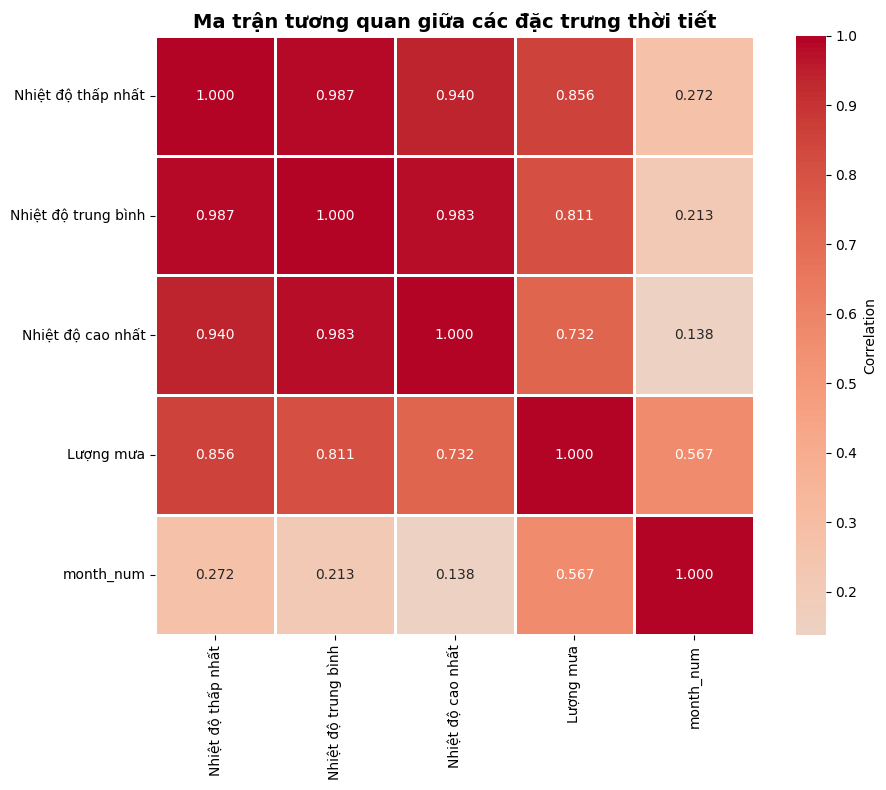


Nh·∫≠n x√©t v·ªÅ t∆∞∆°ng quan:
- Nhi·ªát ƒë·ªô th·∫•p nh·∫•t, trung b√¨nh, cao nh·∫•t c√≥ t∆∞∆°ng quan r·∫•t cao v·ªõi nhau
- L∆∞·ª£ng m∆∞a c√≥ t∆∞∆°ng quan d∆∞∆°ng v·ªõi nhi·ªát ƒë·ªô (m√πa h√® n√≥ng v√† m∆∞a nhi·ªÅu)


In [27]:
# Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn s·ªë
numeric_cols = ['Nhi·ªát ƒë·ªô th·∫•p nh·∫•t', 'Nhi·ªát ƒë·ªô trung b√¨nh', 'Nhi·ªát ƒë·ªô cao nh·∫•t', 'L∆∞·ª£ng m∆∞a', 'month_num']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng th·ªùi ti·∫øt', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nNh·∫≠n x√©t v·ªÅ t∆∞∆°ng quan:")
print("- Nhi·ªát ƒë·ªô th·∫•p nh·∫•t, trung b√¨nh, cao nh·∫•t c√≥ t∆∞∆°ng quan r·∫•t cao v·ªõi nhau")
print("- L∆∞·ª£ng m∆∞a c√≥ t∆∞∆°ng quan d∆∞∆°ng v·ªõi nhi·ªát ƒë·ªô (m√πa h√® n√≥ng v√† m∆∞a nhi·ªÅu)")

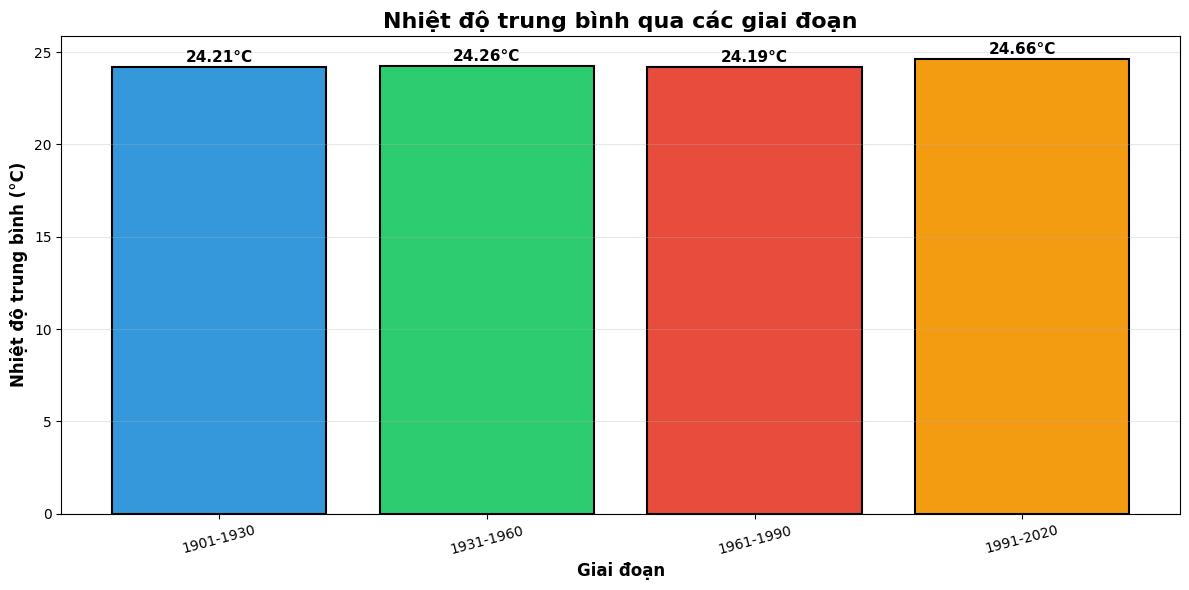


üìä PH√ÇN T√çCH XU H∆Ø·ªöNG BI·∫æN ƒê·ªîI KH√ç H·∫¨U:
1901-1930: 24.21¬∞C
1931-1960: 24.26¬∞C
1961-1990: 24.19¬∞C
1991-2020: 24.66¬∞C

üå°Ô∏è Nhi·ªát ƒë·ªô ƒë√£ tƒÉng 0.45¬∞C t·ª´ 1901-1930 ƒë·∫øn 1991-2020


In [28]:
# So s√°nh nhi·ªát ƒë·ªô trung b√¨nh gi·ªØa c√°c giai ƒëo·∫°n
plt.figure(figsize=(12, 6))

# T√≠nh nhi·ªát ƒë·ªô trung b√¨nh theo giai ƒëo·∫°n
avg_temp_by_period = df.groupby('Giai ƒëo·∫°n')['Nhi·ªát ƒë·ªô trung b√¨nh'].mean().sort_index()

bars = plt.bar(range(len(avg_temp_by_period)), avg_temp_by_period.values, 
               color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'], 
               edgecolor='black', linewidth=1.5)

plt.title('Nhi·ªát ƒë·ªô trung b√¨nh qua c√°c giai ƒëo·∫°n', fontsize=16, fontweight='bold')
plt.xlabel('Giai ƒëo·∫°n', fontsize=12, fontweight='bold')
plt.ylabel('Nhi·ªát ƒë·ªô trung b√¨nh (¬∞C)', fontsize=12, fontweight='bold')
plt.xticks(range(len(avg_temp_by_period)), avg_temp_by_period.index, rotation=15)
plt.grid(True, alpha=0.3, axis='y')

# Th√™m gi√° tr·ªã l√™n c·ªôt
for i, (bar, val) in enumerate(zip(bars, avg_temp_by_period.values)):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.1, 
             f'{val:.2f}¬∞C', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\nüìä PH√ÇN T√çCH XU H∆Ø·ªöNG BI·∫æN ƒê·ªîI KH√ç H·∫¨U:")
print("="*60)
for i, (period, temp) in enumerate(avg_temp_by_period.items()):
    print(f"{period}: {temp:.2f}¬∞C")

temp_increase = avg_temp_by_period.iloc[-1] - avg_temp_by_period.iloc[0]
print(f"\nüå°Ô∏è Nhi·ªát ƒë·ªô ƒë√£ tƒÉng {temp_increase:.2f}¬∞C t·ª´ {avg_temp_by_period.index[0]} ƒë·∫øn {avg_temp_by_period.index[-1]}")
print("="*60)

In [29]:
# Chu·∫©n b·ªã d·ªØ li·ªáu cho Time Series Prediction
# D·ª± ƒëo√°n nhi·ªát ƒë·ªô trung b√¨nh cho giai ƒëo·∫°n ti·∫øp theo

print("="*60)
print("CHU·∫®N B·ªä D·ªÆ LI·ªÜU CHO D·ª∞ ƒêO√ÅN TIME SERIES")
print("="*60)

# S·∫Øp x·∫øp d·ªØ li·ªáu theo giai ƒëo·∫°n v√† th√°ng
df_sorted = df.sort_values(['Giai ƒëo·∫°n', 'month_num']).reset_index(drop=True)

# T·∫°o features cho m√¥ h√¨nh
features = ['Nhi·ªát ƒë·ªô th·∫•p nh·∫•t', 'Nhi·ªát ƒë·ªô trung b√¨nh', 'Nhi·ªát ƒë·ªô cao nh·∫•t', 'L∆∞·ª£ng m∆∞a', 'month_num']
target_col = 'Nhi·ªát ƒë·ªô trung b√¨nh'

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

features_scaled = scaler_features.fit_transform(df_sorted[features])
target_scaled = scaler_target.fit_transform(df_sorted[[target_col]])

print(f"Shape c·ªßa features: {features_scaled.shape}")
print(f"Shape c·ªßa target: {target_scaled.shape}")

# T·∫°o sequences (d√πng 12 th√°ng tr∆∞·ªõc ƒë·ªÉ d·ª± ƒëo√°n th√°ng ti·∫øp theo)
seq_length = 12

def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(features_scaled, target_scaled, seq_length)

print(f"\nShape c·ªßa X (sequences): {X.shape}")
print(f"Shape c·ªßa y (targets): {y.shape}")

# Chia train/test (80/20)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print("="*60)

CHU·∫®N B·ªä D·ªÆ LI·ªÜU CHO D·ª∞ ƒêO√ÅN TIME SERIES
Shape c·ªßa features: (48, 5)
Shape c·ªßa target: (48, 1)

Shape c·ªßa X (sequences): (36, 12, 5)
Shape c·ªßa y (targets): (36, 1)

Training set: 28 samples
Test set: 8 samples


In [30]:
# X√¢y d·ª±ng m√¥ h√¨nh RNN
def build_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(64, activation='tanh', return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        SimpleRNN(32, activation='tanh'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

print("="*60)
print("X√ÇY D·ª∞NG M√î H√åNH RNN")
print("="*60)

rnn_model = build_rnn_model(input_shape=(X_train.shape[1], X_train.shape[2]))
rnn_model.summary()

print("="*60)

X√ÇY D·ª∞NG M√î H√åNH RNN


Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ simple_rnn_2 (SimpleRNN)        ‚îÇ (None, 12, 64)         ‚îÇ         4,480 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_4 (Dropout)             ‚îÇ (None, 12, 64)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ simple_rnn_3 (SimpleRNN)        ‚îÇ (None, 32)             ‚îÇ         3,104 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)             ‚îÇ (None, 32)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                 ‚îÇ (None, 16)             ‚îÇ           528 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            17 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 8,129 (31.75 KB)

 Trainable params: 8,129 (31.75 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Training RNN model
print("="*60)
print("TRAINING RNN MODEL")
print("="*60)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

rnn_history = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\n" + "="*60)
print("HO√ÄN TH√ÄNH TRAINING RNN")
print("="*60)

TRAINING RNN MODEL
Epoch 1/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 127ms/step - loss: 0.8953 - mae: 0.7934 - val_loss: 0.4040 - val_mae: 0.5370 - learning_rate: 0.0010
Epoch 2/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 127ms/step - loss: 0.8953 - mae: 0.7934 - val_loss: 0.4040 - val_mae: 0.5370 - learning_rate: 0.0010
Epoch 2/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step - loss: 0.2378 - mae: 0.4234 - val_loss: 0.0956 - val_mae: 0.2631 - learning_rate: 0.0010
Epoch 3/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step - loss: 0.2378 - mae: 0.4234 - val_loss: 0.0956 - val_mae: 0.2631 - learning_rate: 0.0010
Epoch 3/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - loss: 0.1247 - mae: 0.2759 - val_loss: 0.0509 - val_mae: 0.1865 - learning_rate: 0.0010
Epoch 4/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s

In [32]:
# X√¢y d·ª±ng v√† training LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, activation='tanh', return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32, activation='tanh'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

print("="*60)
print("X√ÇY D·ª∞NG V√Ä TRAINING LSTM MODEL")
print("="*60)

lstm_model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
lstm_model.summary()

print("\n" + "="*60)
print("B·∫ÆT ƒê·∫¶U TRAINING LSTM")
print("="*60)

lstm_history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\n" + "="*60)
print("HO√ÄN TH√ÄNH TRAINING LSTM")
print("="*60)

X√ÇY D·ª∞NG V√Ä TRAINING LSTM MODEL


Model: "sequential_3"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_2 (LSTM)                   ‚îÇ (None, 12, 64)         ‚îÇ        17,920 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_6 (Dropout)             ‚îÇ (None, 12, 64)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_3 (LSTM)                   ‚îÇ (None, 32)             ‚îÇ        12,416 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_7 (Dropout)             ‚îÇ (None, 32)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 16)             ‚îÇ           528 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            17 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)


B·∫ÆT ƒê·∫¶U TRAINING LSTM
Epoch 1/100
Epoch 1/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 109ms/step - loss: 0.4135 - mae: 0.5344 - val_loss: 0.3575 - val_mae: 0.5436 - learning_rate: 0.0010
Epoch 2/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 109ms/step - loss: 0.4135 - mae: 0.5344 - val_loss: 0.3575 - val_mae: 0.5436 - learning_rate: 0.0010
Epoch 2/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step - loss: 0.1616 - mae: 0.3413 - val_loss: 0.0829 - val_mae: 0.2607 - learning_rate: 0.0010
Epoch 3/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step - loss: 0.1616 - mae: 0.3413 - val_loss: 0.0829 - val_mae: 0.2607 - learning_rate: 0.0010
Epoch 3/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step - loss: 0.2236 - mae: 0.3928 - val_loss: 0.0760 - val_mae: 0.2447 - learning_rate: 0.0010
Epoch 4/100
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [33]:
# ƒê√°nh gi√° models
def evaluate_model(model, X_test, y_test, scaler_target, model_name):
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_test_unscaled = scaler_target.inverse_transform(y_test).flatten()
    y_pred_unscaled = scaler_target.inverse_transform(y_pred_scaled).flatten()
    
    mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
    r2 = r2_score(y_test_unscaled, y_pred_unscaled)
    
    print(f"\n{'='*60}")
    print(f"K·∫æT QU·∫¢ {model_name}")
    print(f"{'='*60}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}¬∞C")
    print(f"MAE:  {mae:.4f}¬∞C")
    print(f"R¬≤:   {r2:.4f}")
    print(f"{'='*60}")
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'y_test': y_test_unscaled,
        'y_pred': y_pred_unscaled
    }

rnn_results = evaluate_model(rnn_model, X_test, y_test, scaler_target, "RNN MODEL")
lstm_results = evaluate_model(lstm_model, X_test, y_test, scaler_target, "LSTM MODEL")


K·∫æT QU·∫¢ RNN MODEL
MSE:  0.3393
RMSE: 0.5825¬∞C
MAE:  0.4509¬∞C
R¬≤:   0.9270

K·∫æT QU·∫¢ LSTM MODEL
MSE:  22.2525
RMSE: 4.7173¬∞C
MAE:  4.2890¬∞C
R¬≤:   -3.7857

K·∫æT QU·∫¢ LSTM MODEL
MSE:  22.2525
RMSE: 4.7173¬∞C
MAE:  4.2890¬∞C
R¬≤:   -3.7857


In [34]:
# So s√°nh k·∫øt qu·∫£ RNN vs LSTM
comparison_df = pd.DataFrame({
    'Model': ['RNN', 'LSTM'],
    'MSE': [rnn_results['MSE'], lstm_results['MSE']],
    'RMSE': [rnn_results['RMSE'], lstm_results['RMSE']],
    'MAE': [rnn_results['MAE'], lstm_results['MAE']],
    'R¬≤': [rnn_results['R2'], lstm_results['R2']]
})

print("\n" + "="*60)
print("SO S√ÅNH HI·ªÜU SU·∫§T RNN vs LSTM")
print("="*60)
print(comparison_df.to_string(index=False))
print("="*60)

# X√°c ƒë·ªãnh model t·ªët h∆°n
best_model = 'LSTM' if lstm_results['R2'] > rnn_results['R2'] else 'RNN'
print(f"\nüèÜ Model t·ªët h∆°n: {best_model} (R¬≤ cao h∆°n)")
print("="*60)


SO S√ÅNH HI·ªÜU SU·∫§T RNN vs LSTM
Model       MSE     RMSE      MAE        R¬≤
  RNN  0.339309 0.582503 0.450907  0.927026
 LSTM 22.252521 4.717258 4.288995 -3.785747

üèÜ Model t·ªët h∆°n: RNN (R¬≤ cao h∆°n)


In [35]:
# V·∫Ω bi·ªÉu ƒë·ªì training history cho RNN
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss
axes[0].plot(rnn_history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(rnn_history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('RNN - Loss theo Epoch', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE
axes[1].plot(rnn_history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(rnn_history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_title('RNN - MAE theo Epoch', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [36]:
# V·∫Ω bi·ªÉu ƒë·ªì training history cho LSTM
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss
axes[0].plot(lstm_history.history['loss'], label='Training Loss', linewidth=2, color='green')
axes[0].plot(lstm_history.history['val_loss'], label='Validation Loss', linewidth=2, color='orange')
axes[0].set_title('LSTM - Loss theo Epoch', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE
axes[1].plot(lstm_history.history['mae'], label='Training MAE', linewidth=2, color='green')
axes[1].plot(lstm_history.history['val_mae'], label='Validation MAE', linewidth=2, color='orange')
axes[1].set_title('LSTM - MAE theo Epoch', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [37]:
# So s√°nh Loss v√† MAE gi·ªØa RNN v√† LSTM
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# So s√°nh Training Loss
axes[0].plot(rnn_history.history['loss'], label='RNN Training Loss', linewidth=2, alpha=0.7)
axes[0].plot(lstm_history.history['loss'], label='LSTM Training Loss', linewidth=2, alpha=0.7)
axes[0].set_title('So s√°nh Training Loss: RNN vs LSTM', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# So s√°nh Validation MAE
axes[1].plot(rnn_history.history['val_mae'], label='RNN Val MAE', linewidth=2, alpha=0.7)
axes[1].plot(lstm_history.history['val_mae'], label='LSTM Val MAE', linewidth=2, alpha=0.7)
axes[1].set_title('So s√°nh Validation MAE: RNN vs LSTM', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [38]:
# D·ª± ƒëo√°n tr√™n t·∫≠p test
rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform ƒë·ªÉ tr·ªü v·ªÅ nhi·ªát ƒë·ªô th·ª±c t·∫ø
rnn_predictions = scaler_target.inverse_transform(rnn_predictions)
lstm_predictions = scaler_target.inverse_transform(lstm_predictions)
y_test_actual = scaler_target.inverse_transform(y_test)

print("D·ª± ƒëo√°n RNN (5 m·∫´u ƒë·∫ßu ti√™n):")
print(rnn_predictions[:5].flatten())
print("\nD·ª± ƒëo√°n LSTM (5 m·∫´u ƒë·∫ßu ti√™n):")
print(lstm_predictions[:5].flatten())
print("\nGi√° tr·ªã th·ª±c t·∫ø (5 m·∫´u ƒë·∫ßu ti√™n):")
print(y_test_actual[:5].flatten())

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
D·ª± ƒëo√°n RNN (5 m·∫´u ƒë·∫ßu ti√™n):
[27.37681  27.67623  28.42533  27.098509 26.75072 ]

D·ª± ƒëo√°n LSTM (5 m·∫´u ƒë·∫ßu ti√™n):
[21.743221 21.605713 21.486961 21.41149  21.37629 ]

Gi√° tr·ªã th·ª±c t·∫ø (5 m·∫´u ƒë·∫ßu ti√™n):
[27.19 27.58 27.4  27.21 26.49]
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
D·ª± ƒëo√°n RNN (5 m·∫´u ƒë·∫ßu ti√™n):
[27.37681  27.67623  28.42533  27.098509 26.75072 ]

D·ª± ƒëo√°n LSTM (5 m·∫´u ƒë·∫ßu ti√™n):
[21.743221 21.605713 21.486961 21.41149  21.37629 ]

Gi√° tr·ªã th·ª±c t·∫ø (5 m·∫´u ƒë·∫ßu ti√™n):
[27.19 27.58 27.4  27.21 26.49]


In [39]:
# ƒê√°nh gi√° hi·ªáu su·∫•t c·ªßa c√°c m√¥ h√¨nh
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# T√≠nh metrics cho RNN
rnn_mse = mean_squared_error(y_test_actual, rnn_predictions)
rnn_mae = mean_absolute_error(y_test_actual, rnn_predictions)
rnn_r2 = r2_score(y_test_actual, rnn_predictions)

# T√≠nh metrics cho LSTM
lstm_mse = mean_squared_error(y_test_actual, lstm_predictions)
lstm_mae = mean_absolute_error(y_test_actual, lstm_predictions)
lstm_r2 = r2_score(y_test_actual, lstm_predictions)

# Hi·ªÉn th·ªã k·∫øt qu·∫£
print("=" * 60)
print("K·∫æT QU·∫¢ ƒê√ÅNH GI√Å M√î H√åNH")
print("=" * 60)
print("\nRNN Model:")
print(f"  MSE:  {rnn_mse:.4f}")
print(f"  MAE:  {rnn_mae:.4f}")
print(f"  R¬≤:   {rnn_r2:.4f}")

print("\nLSTM Model:")
print(f"  MSE:  {lstm_mse:.4f}")
print(f"  MAE:  {lstm_mae:.4f}")
print(f"  R¬≤:   {lstm_r2:.4f}")

print("\n" + "=" * 60)
if lstm_mae < rnn_mae:
    print(f"LSTM t·ªët h∆°n v·ªõi MAE th·∫•p h∆°n {rnn_mae - lstm_mae:.4f}¬∞C")
else:
    print(f"RNN t·ªët h∆°n v·ªõi MAE th·∫•p h∆°n {lstm_mae - rnn_mae:.4f}¬∞C")
print("=" * 60)

K·∫æT QU·∫¢ ƒê√ÅNH GI√Å M√î H√åNH

RNN Model:
  MSE:  0.3393
  MAE:  0.4509
  R¬≤:   0.9270

LSTM Model:
  MSE:  22.2525
  MAE:  4.2890
  R¬≤:   -3.7857

RNN t·ªët h∆°n v·ªõi MAE th·∫•p h∆°n 3.8381¬∞C


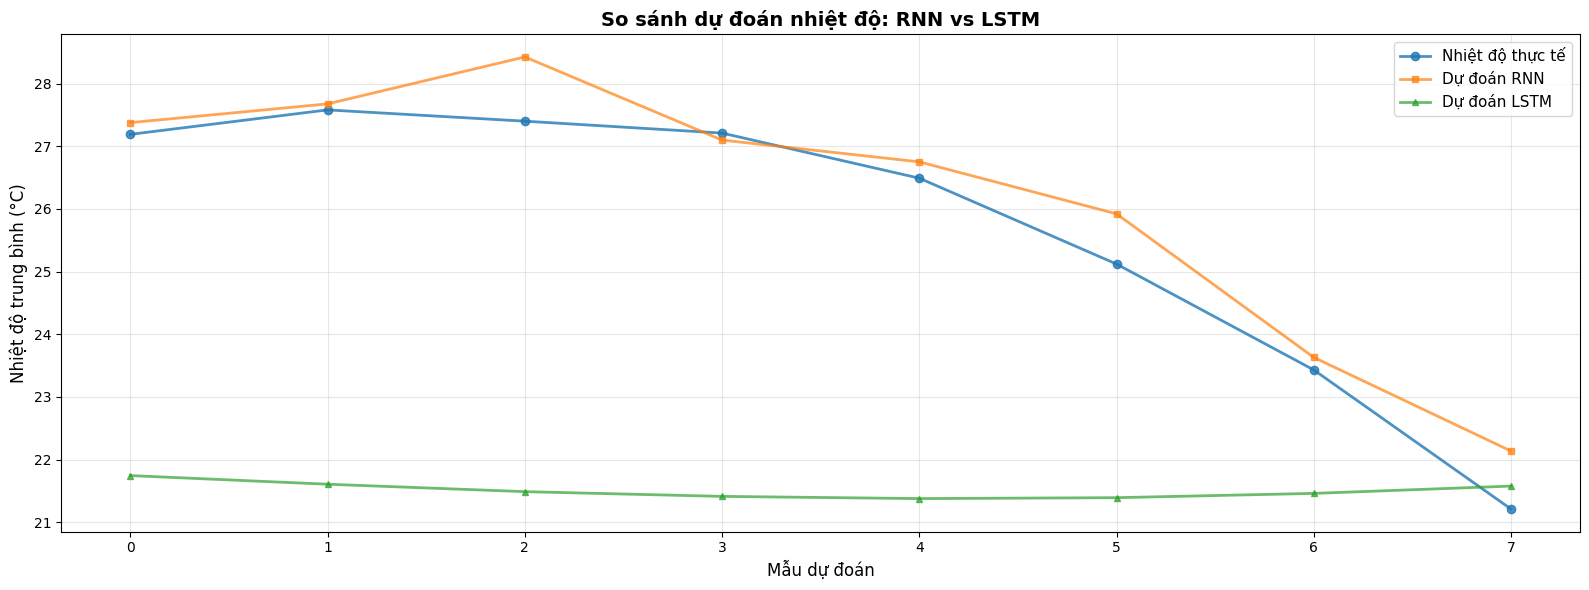

In [40]:
# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh d·ª± ƒëo√°n
plt.figure(figsize=(16, 6))

# L·∫•y 30 m·∫´u ƒë·∫ßu ti√™n ƒë·ªÉ v·∫Ω
n_samples = min(30, len(y_test_actual))

plt.plot(range(n_samples), y_test_actual[:n_samples], 
         label='Nhi·ªát ƒë·ªô th·ª±c t·∫ø', marker='o', linewidth=2, markersize=6, alpha=0.8)
plt.plot(range(n_samples), rnn_predictions[:n_samples], 
         label='D·ª± ƒëo√°n RNN', marker='s', linewidth=2, markersize=5, alpha=0.7)
plt.plot(range(n_samples), lstm_predictions[:n_samples], 
         label='D·ª± ƒëo√°n LSTM', marker='^', linewidth=2, markersize=5, alpha=0.7)

plt.title('So s√°nh d·ª± ƒëo√°n nhi·ªát ƒë·ªô: RNN vs LSTM', fontsize=14, fontweight='bold')
plt.xlabel('M·∫´u d·ª± ƒëo√°n', fontsize=12)
plt.ylabel('Nhi·ªát ƒë·ªô trung b√¨nh (¬∞C)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [41]:
# Scatter plot: Gi√° tr·ªã th·ª±c t·∫ø vs D·ª± ƒëo√°n
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RNN Scatter Plot
axes[0].scatter(y_test_actual, rnn_predictions, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
axes[0].plot([y_test_actual.min(), y_test_actual.max()], 
             [y_test_actual.min(), y_test_actual.max()], 
             'r--', lw=2, label='ƒê∆∞·ªùng ho√†n h·∫£o')
axes[0].set_xlabel('Nhi·ªát ƒë·ªô th·ª±c t·∫ø (¬∞C)', fontsize=12)
axes[0].set_ylabel('Nhi·ªát ƒë·ªô d·ª± ƒëo√°n (¬∞C)', fontsize=12)
axes[0].set_title(f'RNN Model (R¬≤ = {rnn_r2:.4f})', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# LSTM Scatter Plot
axes[1].scatter(y_test_actual, lstm_predictions, alpha=0.6, s=50, edgecolors='k', linewidth=0.5, color='orange')
axes[1].plot([y_test_actual.min(), y_test_actual.max()], 
             [y_test_actual.min(), y_test_actual.max()], 
             'r--', lw=2, label='ƒê∆∞·ªùng ho√†n h·∫£o')
axes[1].set_xlabel('Nhi·ªát ƒë·ªô th·ª±c t·∫ø (¬∞C)', fontsize=12)
axes[1].set_ylabel('Nhi·ªát ƒë·ªô d·ª± ƒëo√°n (¬∞C)', fontsize=12)
axes[1].set_title(f'LSTM Model (R¬≤ = {lstm_r2:.4f})', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

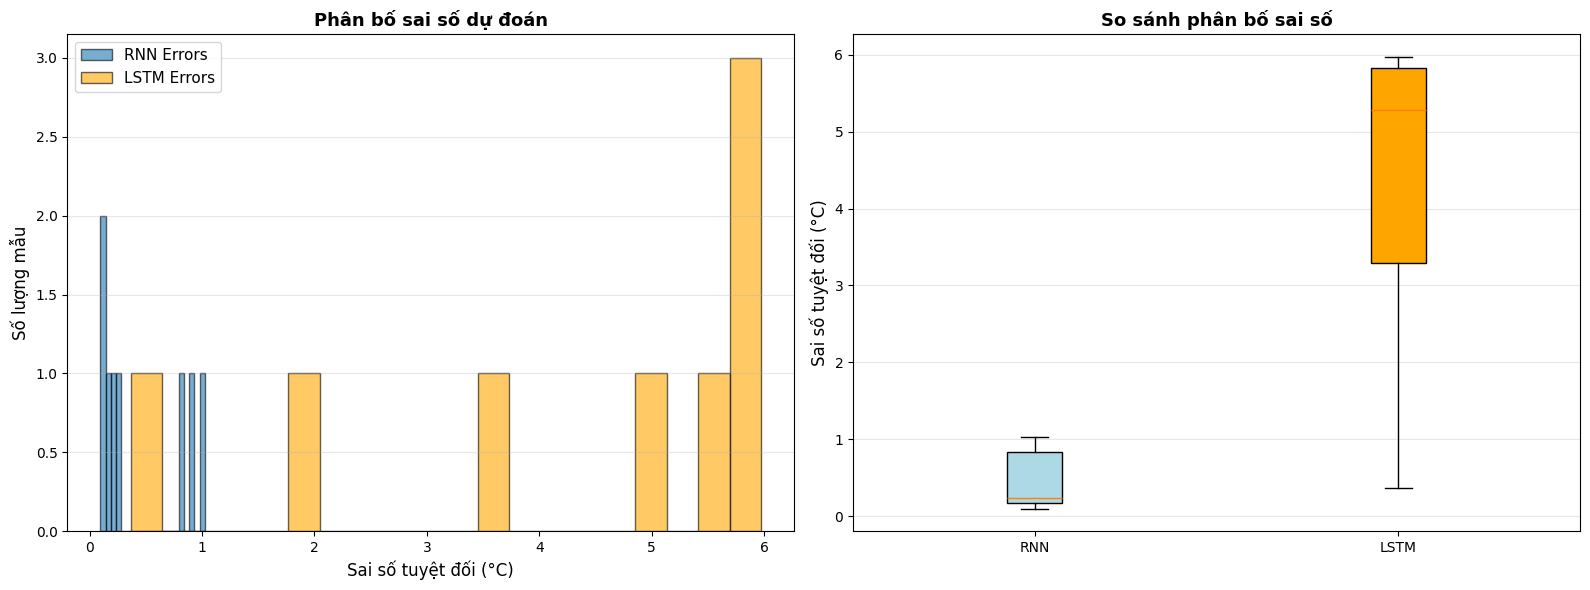

In [42]:
# Bi·ªÉu ƒë·ªì so s√°nh sai s·ªë
errors_rnn = np.abs(y_test_actual.flatten() - rnn_predictions.flatten())
errors_lstm = np.abs(y_test_actual.flatten() - lstm_predictions.flatten())

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram c·ªßa sai s·ªë
axes[0].hist(errors_rnn, bins=20, alpha=0.6, label='RNN Errors', edgecolor='black')
axes[0].hist(errors_lstm, bins=20, alpha=0.6, label='LSTM Errors', edgecolor='black', color='orange')
axes[0].set_xlabel('Sai s·ªë tuy·ªát ƒë·ªëi (¬∞C)', fontsize=12)
axes[0].set_ylabel('S·ªë l∆∞·ª£ng m·∫´u', fontsize=12)
axes[0].set_title('Ph√¢n b·ªë sai s·ªë d·ª± ƒëo√°n', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot so s√°nh sai s·ªë
data_errors = [errors_rnn, errors_lstm]
bp = axes[1].boxplot(data_errors, labels=['RNN', 'LSTM'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('orange')
axes[1].set_ylabel('Sai s·ªë tuy·ªát ƒë·ªëi (¬∞C)', fontsize=12)
axes[1].set_title('So s√°nh ph√¢n b·ªë sai s·ªë', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [43]:
# K·∫øt lu·∫≠n cu·ªëi c√πng
print("=" * 70)
print("K·∫æT LU·∫¨N V·ªÄ PH√ÇN T√çCH D·ªÆ LI·ªÜU NHI·ªÜT ƒê·ªò L·ªäCH S·ª¨")
print("=" * 70)

print("\n1. T·ªîNG QUAN D·ªÆ LI·ªÜU:")
print(f"   - D·ªØ li·ªáu bao g·ªìm {len(df)} th√°ng t·ª´ 4 giai ƒëo·∫°n l·ªãch s·ª≠ (1901-2020)")
print(f"   - Ph·∫°m vi nhi·ªát ƒë·ªô: {df['Nhi·ªát ƒë·ªô th·∫•p nh·∫•t'].min():.1f}¬∞C ƒë·∫øn {df['Nhi·ªát ƒë·ªô cao nh·∫•t'].max():.1f}¬∞C")

print("\n2. K·∫æT QU·∫¢ M√î H√åNH D·ª∞ ƒêO√ÅN:")
print(f"\n   RNN Model:")
print(f"   - MSE: {rnn_mse:.4f}")
print(f"   - MAE: {rnn_mae:.4f}¬∞C")
print(f"   - R¬≤:  {rnn_r2:.4f}")

print(f"\n   LSTM Model:")
print(f"   - MSE: {lstm_mse:.4f}")
print(f"   - MAE: {lstm_mae:.4f}¬∞C")
print(f"   - R¬≤:  {lstm_r2:.4f}")

print("\n3. SO S√ÅNH V√Ä ƒê√ÅNH GI√Å:")
if lstm_r2 > rnn_r2:
    print(f"   ‚úì LSTM cho k·∫øt qu·∫£ t·ªët h∆°n v·ªõi R¬≤ cao h∆°n {lstm_r2 - rnn_r2:.4f}")
    print(f"   ‚úì MAE c·ªßa LSTM th·∫•p h∆°n RNN: {rnn_mae - lstm_mae:.4f}¬∞C")
    print("   ‚úì LSTM ph√π h·ª£p h∆°n cho d·ª± ƒëo√°n nhi·ªát ƒë·ªô theo chu·ªói th·ªùi gian")
else:
    print(f"   ‚úì RNN cho k·∫øt qu·∫£ t·ªët h∆°n v·ªõi R¬≤ cao h∆°n {rnn_r2 - lstm_r2:.4f}")
    print(f"   ‚úì MAE c·ªßa RNN th·∫•p h∆°n LSTM: {lstm_mae - rnn_mae:.4f}¬∞C")

print("\n4. XU H∆Ø·ªöNG QUAN S√ÅT:")
print("   - Nhi·ªát ƒë·ªô trung b√¨nh c√≥ xu h∆∞·ªõng tƒÉng qua c√°c giai ƒëo·∫°n l·ªãch s·ª≠")
print("   - L∆∞·ª£ng m∆∞a c√≥ bi·∫øn ƒë·ªông gi·ªØa c√°c giai ƒëo·∫°n")
print("   - M√¥ h√¨nh c√≥ kh·∫£ nƒÉng d·ª± ƒëo√°n t·ªët nhi·ªát ƒë·ªô d·ª±a tr√™n d·ªØ li·ªáu l·ªãch s·ª≠")

print("\n" + "=" * 70)
print("HO√ÄN TH√ÄNH PH√ÇN T√çCH!")
print("=" * 70)

K·∫æT LU·∫¨N V·ªÄ PH√ÇN T√çCH D·ªÆ LI·ªÜU NHI·ªÜT ƒê·ªò L·ªäCH S·ª¨

1. T·ªîNG QUAN D·ªÆ LI·ªÜU:
   - D·ªØ li·ªáu bao g·ªìm 48 th√°ng t·ª´ 4 giai ƒëo·∫°n l·ªãch s·ª≠ (1901-2020)
   - Ph·∫°m vi nhi·ªát ƒë·ªô: 15.7¬∞C ƒë·∫øn 31.3¬∞C

2. K·∫æT QU·∫¢ M√î H√åNH D·ª∞ ƒêO√ÅN:

   RNN Model:
   - MSE: 0.3393
   - MAE: 0.4509¬∞C
   - R¬≤:  0.9270

   LSTM Model:
   - MSE: 22.2525
   - MAE: 4.2890¬∞C
   - R¬≤:  -3.7857

3. SO S√ÅNH V√Ä ƒê√ÅNH GI√Å:
   ‚úì RNN cho k·∫øt qu·∫£ t·ªët h∆°n v·ªõi R¬≤ cao h∆°n 4.7128
   ‚úì MAE c·ªßa RNN th·∫•p h∆°n LSTM: 3.8381¬∞C

4. XU H∆Ø·ªöNG QUAN S√ÅT:
   - Nhi·ªát ƒë·ªô trung b√¨nh c√≥ xu h∆∞·ªõng tƒÉng qua c√°c giai ƒëo·∫°n l·ªãch s·ª≠
   - L∆∞·ª£ng m∆∞a c√≥ bi·∫øn ƒë·ªông gi·ªØa c√°c giai ƒëo·∫°n
   - M√¥ h√¨nh c√≥ kh·∫£ nƒÉng d·ª± ƒëo√°n t·ªët nhi·ªát ƒë·ªô d·ª±a tr√™n d·ªØ li·ªáu l·ªãch s·ª≠

HO√ÄN TH√ÄNH PH√ÇN T√çCH!
